## Spring 5: Muestreo de datos


In [128]:
import pandas as pd
import matplotlib.pyplot as plt 

Primero sera crear nuestro dataframe con los datos seleccionados. En este caso particular son una serie de archivos  _*.csv_ , cada uno de los cuales tiene la información de una temporada de la ligra española de 1º división.  
*Los datos los he sacado de una web de apuestas , así que no haré referencia a su origen por cuestiones éticas*

Lo primero será crear un array con los nombres de los archivos , para a continuación ir añadiendolos a un dataframe mediante un bucle for.

In [129]:
archivos=list()
for i in range(31):
    archivos.append("SP1("+str(i)+").csv")
print(archivos)

['SP1(0).csv', 'SP1(1).csv', 'SP1(2).csv', 'SP1(3).csv', 'SP1(4).csv', 'SP1(5).csv', 'SP1(6).csv', 'SP1(7).csv', 'SP1(8).csv', 'SP1(9).csv', 'SP1(10).csv', 'SP1(11).csv', 'SP1(12).csv', 'SP1(13).csv', 'SP1(14).csv', 'SP1(15).csv', 'SP1(16).csv', 'SP1(17).csv', 'SP1(18).csv', 'SP1(19).csv', 'SP1(20).csv', 'SP1(21).csv', 'SP1(22).csv', 'SP1(23).csv', 'SP1(24).csv', 'SP1(25).csv', 'SP1(26).csv', 'SP1(27).csv', 'SP1(28).csv', 'SP1(29).csv', 'SP1(30).csv']


In [130]:
datos_liga=pd.read_csv("./datos/"+archivos[0])


In [131]:
for i in range(1,25):
    temp=pd.read_csv("./datos/"+archivos[i])
    datos_liga=datos_liga.append(temp,ignore_index=True)

In [132]:
datos_liga.describe

<bound method NDFrame.describe of       Div        Date   Time     HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0     SP1  13/08/2021  20:00     Valencia       Getafe     1     0   H     1   
1     SP1  14/08/2021  18:30        Cadiz      Levante     1     1   D     0   
2     SP1  14/08/2021  18:30     Mallorca        Betis     1     1   D     1   
3     SP1  14/08/2021  21:00       Alaves  Real Madrid     1     4   A     0   
4     SP1  14/08/2021  21:00      Osasuna      Espanol     0     0   D     0   
...   ...         ...    ...          ...          ...   ...   ...  ..   ...   
9495  SP1    18/05/08    NaN  Real Madrid      Levante     5     2   H     3   
9496  SP1    18/05/08    NaN   Recreativo   Valladolid     1     1   D     0   
9497  SP1    18/05/08    NaN    Santander      Osasuna     1     0   H     0   
9498  SP1    18/05/08    NaN      Sevilla   Ath Bilbao     4     1   H     1   
9499  SP1    18/05/08    NaN     Valencia   Ath Madrid     3     1   H     2   

     

In [133]:
datos_liga["Date"].describe

<bound method NDFrame.describe of 0       13/08/2021
1       14/08/2021
2       14/08/2021
3       14/08/2021
4       14/08/2021
           ...    
9495      18/05/08
9496      18/05/08
9497      18/05/08
9498      18/05/08
9499      18/05/08
Name: Date, Length: 9500, dtype: object>

Ya tenemos nuestro dataframe. Este sera nuestro universo de datos : datos de encuentros de la 1º división española desde la temporada 2021 a la de 2008. Por su origen poseen muchos datos que no queremos y por su extensión en el tiempo hay campos que han aparecido y desaparecido .  
Antes de seleccionar algunos campos para comprobar los datos , realizaremos el muestreo de datos.


En nuestro caso ya sabemos que utilizaremos una muestreo aleatorio y sistematico , por lo que nos centramos en cuanto de extenso debe ser nuestro muestreo.  
Para este caso , al ser un dataframe poco extenso podemos comparar los datos originales con los de los muestreados así que usaremos muestreo del 10% y el 5 % y compararemos.  


sampling 5% aleatorio

In [134]:
random_liga_5=datos_liga.sample(500)

sampling 10% aleatorio

In [135]:
random_liga_10=datos_liga.sample(1000)

sampling 5% sistemático  
Para ello primero crearé una lista con las posiciones del dataframe que quiero muestrear. Básicamente es poner los límites de filas del dataframe para que no de error y el intervalo que queramos para obtener el númeo de datos requerido.

In [136]:

seleccion_5=range(0,9499,int(9500/500))
systematic_random_liga_5=datos_liga.loc[seleccion_5]

sampling 10% sistemático  

In [137]:
seleccion_10=range(0,9499,int(9500/1000))
systematic_random_liga_10=datos_liga.loc[seleccion_10]

Ya tenemos nuestro muestreo hecho (al 5% y al 10%) y aleatorio y sistemático. Primero nos quedaremos con algunos campos que puedan ser interesantes.


*HomeTeam = Home Team*   
    *AwayTeam = Away Team*  
    *FTHG and HG = Full Time Home Team Goals*  
    *FTAG and AG = Full Time Away Team Goals*  
    *FTR and Res = Full Time Result (H=Home Win, D=Draw, A=Away Win)*  
    *HTHG = Half Time Home Team Goals*  
    *HTAG = Half Time Away Team Goals*  
    *HTR = Half Time Result (H=Home Win, D=Draw, A=Away Win)*  


In [138]:
datos_liga=datos_liga[["HomeTeam","AwayTeam","HTR","FTR","FTHG","FTAG"]]
random_liga_5=random_liga_5[["HomeTeam","AwayTeam","HTR","FTR","FTHG","FTAG"]]
systematic_random_liga_5=systematic_random_liga_5[["HomeTeam","AwayTeam","HTR","FTR","FTHG","FTAG"]]

In [139]:

random_liga_10=random_liga_10[["HomeTeam","AwayTeam","HTR","FTR","FTHG","FTAG"]]
systematic_random_liga_10=systematic_random_liga_10[["HomeTeam","AwayTeam","HTR","FTR","FTHG","FTAG"]]


La primera cuestión es si con un5% hubiera sido un límite aceptable o por el contrario estaríamos sesgando datos al coger una muestra muy pequeña de datos.O al contrario, es el 10% un muestreo adecuado , o estamos desperdiciando recursos sin obtener una mejora de la calidad de la información que podemos extraer.  
Haremos una visión somera para ver que podemos inferir.

Primero comparamos los muestreos del 5% y del 10% entre ellos gráficamente.


(array([[172.,   0.,   0.,   0.,   0., 210.,   0.,   0.,   0., 118.],
        [353.,   0.,   0.,   0.,   0., 399.,   0.,   0.,   0., 248.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 BarContainer objects>)

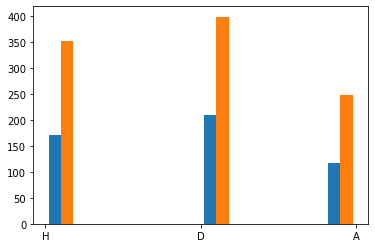

In [140]:
plt.hist([random_liga_5["HTR"],random_liga_10["HTR"]])

(array([[169.,   0.,   0.,   0.,   0., 217.,   0.,   0.,   0., 114.],
        [389.,   0.,   0.,   0.,   0., 460.,   0.,   0.,   0., 207.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 2 BarContainer objects>)

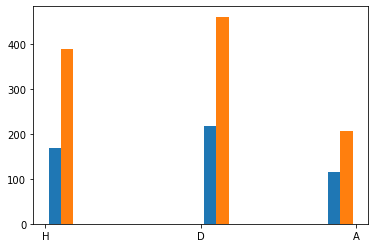

In [141]:
plt.hist([systematic_random_liga_5["HTR"],systematic_random_liga_10["HTR"]])

Si los comparamos todos , vemos que la tendencia general se mantiene.  
En la media parte hay una tendencia a que el resultado sea de empate , seguido de cerca por que el equipo local este por delante en el marcador y bastante por detrás , que sea el visitante el que gane.

(array([[3350.,    0.,    0.,    0.,    0., 2167.,    0.,    0.,    0.,
         3983.],
        [ 172.,    0.,    0.,    0.,    0.,  118.,    0.,    0.,    0.,
          210.],
        [ 353.,    0.,    0.,    0.,    0.,  248.,    0.,    0.,    0.,
          399.],
        [ 169.,    0.,    0.,    0.,    0.,  114.,    0.,    0.,    0.,
          217.],
        [ 389.,    0.,    0.,    0.,    0.,  207.,    0.,    0.,    0.,
          460.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 5 BarContainer objects>)

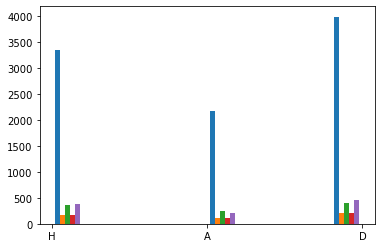

In [142]:
plt.hist([datos_liga["HTR"],random_liga_5["HTR"],random_liga_10["HTR"],systematic_random_liga_5["HTR"],systematic_random_liga_10["HTR"]])

Si acotamos más los datos ,concretándolos, por ej. selecionado un equipo en concreto , podemos observar alguna variación más acusada debido a que al disponer de menos datos , cada uno cuenta más, pero la tendencia general sigue siendo la misma

(array([[ 6.,  0.,  0.,  0.,  0., 19.,  0.,  0.,  0.,  4.],
        [ 8.,  0.,  0.,  0.,  0., 10.,  0.,  0.,  0.,  4.],
        [ 9.,  0.,  0.,  0.,  0., 34.,  0.,  0.,  0., 10.],
        [12.,  0.,  0.,  0.,  0., 27.,  0.,  0.,  0.,  9.]]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 4 BarContainer objects>)

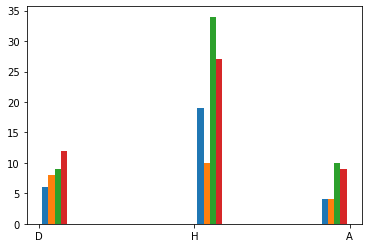

In [143]:
plt.hist([random_liga_5[random_liga_5["HomeTeam"]=="Valencia"]["FTR"],systematic_random_liga_5[systematic_random_liga_5["HomeTeam"]=="Valencia"]["FTR"],
random_liga_10[random_liga_10["HomeTeam"]=="Valencia"]["FTR"],systematic_random_liga_10[systematic_random_liga_10["HomeTeam"]=="Valencia"]["FTR"]])

### Conclusión:
Aunque es un estudio muy simple y poco profundo , parece que nuestro muestreo al 5% si que ha conseguido capturar las tendencias generales del conjunto de datos del que partíamos.  
Además no vemos que el metódo de muestreo(aleatorio o sistemático), tenga un efecto de sesgo en los resultados.  
Esto puede ser debido a que cada temporada el orden de los partidos se sortea , con lo que ese elemento aleatorio introducido ya de base en los datos de partida , seguramente, facilita que los datos tengan una distribución normal y no tengan sesgo al hacer un muestreo sistemático.  
Si el calendario siempre siguiera el mismo orden podría suceder , sobretodo en el muestreo sistemático del 5%, que hubiese equipos que no serian muestreados y otros que siempre.  
Esto provocaria una sobrerepresentación de ciertos equipos y una subrepresentación de otros en los datos muestreados, lo que podría llevar a sesgos (por ejemplo el porcentaje de victorias de los visitantes si en el muestreo Madrid y Barcelona estuviesen sobrerepresentados , ya que harian que pareciesen superiores a lo que són por termino medio (en teoría, se debería ver en los datos ;) )